# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [154]:
def diagonales(n, d, C):

    meanClass0 = np.full(d,-1)
    meanClass1 = np.full(d, 1)

    standarDeviation = C * np.sqrt(d)
    
    covarianceMatrix = np.eye(d) * (standarDeviation ** 2)
    
    inputClass0 = np.random.multivariate_normal(meanClass0, covarianceMatrix, n//2)
    inputClass1 = np.random.multivariate_normal(meanClass1, covarianceMatrix, n//2)

    outputClass0 = np.full(n//2, 0)
    outputClass1 = np.full(n//2, 1)

    samplesDataFrame = pd.DataFrame({
        "Input"  : np.concatenate([inputClass0, inputClass1]).tolist(),
        "Output" : np.concatenate([outputClass0, outputClass1]).tolist()
    })

    return samplesDataFrame
    

Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

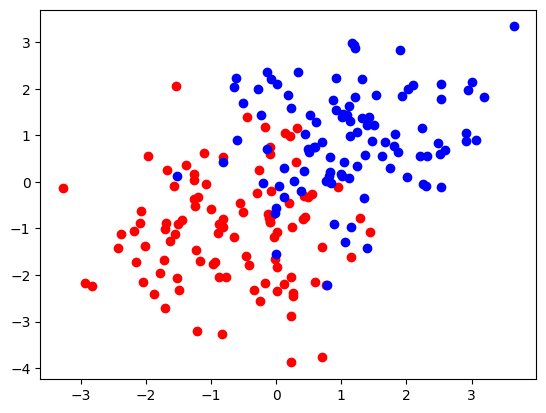

In [155]:
diag_df = diagonales(200, 2, 0.75)

# diferenciar entre clase 0 y clase 1
samplesClass0 = diag_df[diag_df["Output"] == 0]
samplesClass1 = diag_df[diag_df["Output"] == 1]

xs0 = np.array([entry[0] for entry in samplesClass0["Input"]])
ys0 = np.array([entry[1] for entry in samplesClass0["Input"]])
xs1 = np.array([entry[0] for entry in samplesClass1["Input"]])
ys1 = np.array([entry[1] for entry in samplesClass1["Input"]])

plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [156]:
def paralelas(n, d, C):
    
    meanClass0 = np.full(d,0)
    meanClass0[0] = 1
    
    meanClass1 = np.full(d, 0)
    meanClass1[0] = -1

    standarDeviation = C
    
    covarianceMatrix = np.eye(d) * (standarDeviation ** 2)
    
    inputClass0 = np.random.multivariate_normal(meanClass0, covarianceMatrix, n//2)
    inputClass1 = np.random.multivariate_normal(meanClass1, covarianceMatrix, n//2)

    outputClass0 = np.full(n//2, 0)
    outputClass1 = np.full(n//2, 1)

    samplesDataFrame = pd.DataFrame({
        "Input"  : np.concatenate([inputClass0, inputClass1]).tolist(),
        "Output" : np.concatenate([outputClass0, outputClass1]).tolist()
    })

    return samplesDataFrame
    

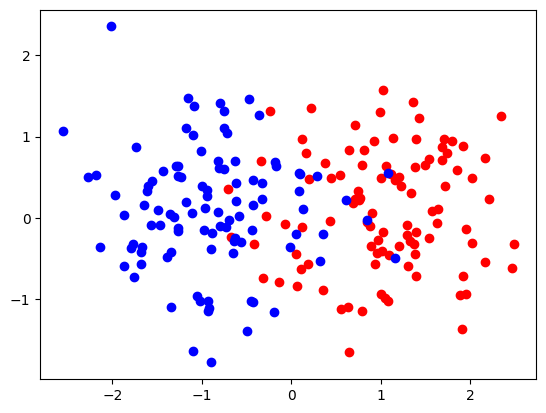

In [157]:
parallel_df = paralelas(200, 2, 0.75)

# diferenciar entre clase 0 y clase 1
samplesClass0 = parallel_df[parallel_df["Output"] == 0]
samplesClass1 = parallel_df[parallel_df["Output"] == 1]

xs0 = np.array([entry[0] for entry in samplesClass0["Input"]])
ys0 = np.array([entry[1] for entry in samplesClass0["Input"]])
xs1 = np.array([entry[0] for entry in samplesClass1["Input"]])
ys1 = np.array([entry[1] for entry in samplesClass1["Input"]])

plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

In [158]:

def curve0(theta):
    return (theta) / (4 * np.pi)
    
def curve1(theta):
    return (theta +  + np.pi) / (4 * np.pi)

def chooseClass(entry):

    angle, radius = entry
    normalizedAngle = angle
    if (curve0(normalizedAngle) <= radius <= curve1(normalizedAngle)) or (curve0(normalizedAngle + 2 * np.pi) <= radius <= curve1(normalizedAngle + 2 * np.pi)) or (curve0(normalizedAngle - 2 * np.pi) <= radius <= curve1(normalizedAngle - 2 * np.pi)):
        return 0
    else:
        return 1

    

In [159]:
# def espirales(n):

#     maxRadius = 1
#     maxAngle = 2 * np.pi
    
#     inputClasses = np.random.uniform([0,0],[maxAngle, maxRadius], (n,2))
    
#     outputClasses = np.array([chooseClass(entry) for entry in inputClasses])
    
#     samplesDataFrame = pd.DataFrame({
#         "Input"  : inputClasses.tolist(),
#         "Output" : outputClasses.tolist()
#     })

#     return samplesDataFrame

In [160]:
def entre_curvas(rho, theta):
  rho_1 = theta/(4*math.pi)
  rho_2 = (theta + math.pi)/(4*math.pi)
  rho_3 = (theta + 2*math.pi)/(4*math.pi)
  rho_4 = (theta + 3*math.pi)/(4*math.pi)
  rho_5 = (theta + 4*math.pi)/(4*math.pi)
  rho_6 = (theta + 5*math.pi)/(4*math.pi)
  return (rho_1 < rho and rho < rho_2) or (rho_3 < rho and rho < rho_4) or (rho_5 < rho and rho < rho_6)


def espirales(n):

  inputs = []
  outputs = []

  cat0_t = 0
  cat1_t = 0
  while cat0_t + cat1_t != n:
    rho = math.sqrt(np.random.uniform())
    theta = np.random.uniform(-math.pi, math.pi)

    x = rho * math.cos(theta)
    y = rho * math.sin(theta)

    if entre_curvas(rho, theta) and cat0_t < n//2:
      inputs.append([x,y])
      outputs.append(0)
      cat0_t = cat0_t + 1
    elif (not entre_curvas(rho, theta)) and cat1_t < n//2:
      inputs.append([x,y])
      outputs.append(1)
      cat1_t = cat1_t + 1

  return pd.DataFrame({'input': inputs, 'output': outputs})


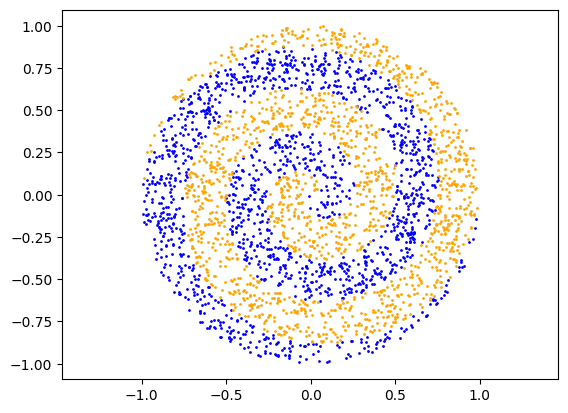

In [161]:
spiral_df = espirales(3000)

# diferenciar entre clase 0 y clase 1
samplesClass0 = spiral_df[spiral_df["output"] == 0]
samplesClass1 = spiral_df[spiral_df["output"] == 1]

xs0 = np.array([entry[0] for entry in samplesClass0["input"]])
ys0     = np.array([entry[1] for entry in samplesClass0["input"]])
xs1 = np.array([entry[0] for entry in samplesClass1["input"]])
ys1     = np.array([entry[1] for entry in samplesClass1["input"]])

plt.scatter(xs0, ys0, color='blue',s = 1)
plt.scatter(xs1, ys1, color='orange',s = 1)
plt.axis('equal')
plt.show()

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def standardTree():
    return DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)

# Ejercicio 1
## Enunciado
Genere tres conjuntos de datos de entrenamiento correspondientes al problema de las espirales anidadas de la práctica de python, uno de longitud 150, otro de 600 y un tercero de 3000. Genere un conjunto de test de longitud 10000. A partir de cada uno de los conjuntos de entrenamiento, entrene el árbol de decisión correspondiente y grafique las predicciones sobre el conjunto de test. Comente los resultados.

In [163]:
testSet = list(espirales(10000)["input"])

sizes = [150, 600, 3000]

trainingSets = []
for sz in sizes:
    trainingSets.append(espirales(sz))

classifiers = []
for i in range(len(trainingSets)):
    classifiers.append(standardTree())


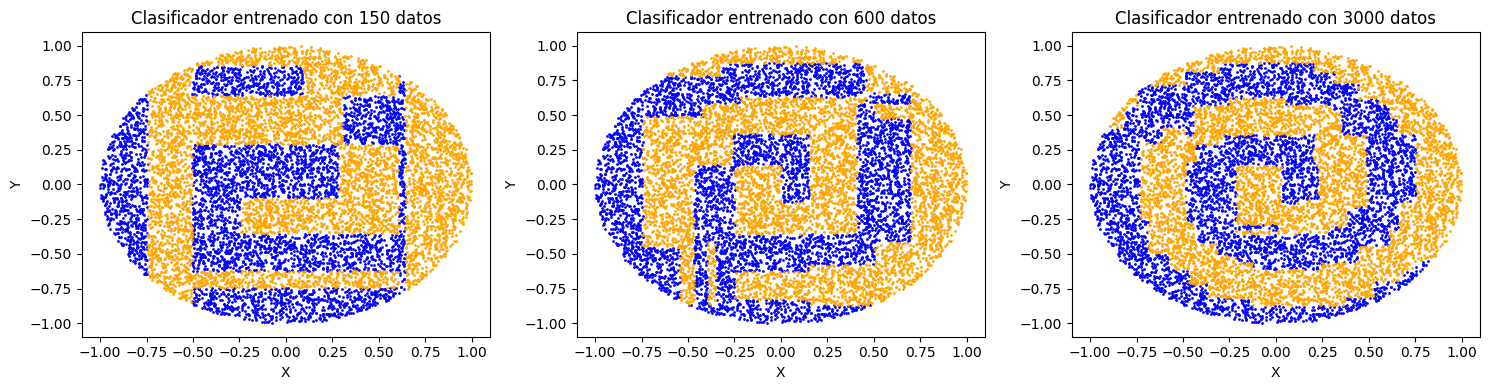

In [164]:
# Entrenamos cada clasificador
for i in range(3):
    classifiers[i].fit(list(trainingSets[i]["input"]), list(trainingSets[i]["output"]))

# Y plotteamos
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
for i, trainingSet in enumerate(trainingSets):

    # Predecimos sobre el conjunto de testeo
    predict = classifiers[i].predict(testSet)

    # Nos quedamos con las componentes de los clase 0
    x0 = np.array([e[0] for (i,e) in enumerate(testSet) if predict[i] == 0])
    y0 = np.array([e[1] for (i,e) in enumerate(testSet) if predict[i] == 0])

    # Y las componentes de los clase 1
    x1 = np.array([e[0] for (i,e) in enumerate(testSet) if predict[i] == 1])
    y1 = np.array([e[1] for (i,e) in enumerate(testSet) if predict[i] == 1])

    # Y plotteamos en el subplot correspondiente
    axes[i].scatter(x0, y0, color = "blue", s = 1)
    axes[i].scatter(x1, y1, color = "orange", s = 1)

    # Detalles del plot
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].set_title(f'Clasificador entrenado con {sizes[i]} datos')

plt.tight_layout()
plt.show()

## Comentarios sobre los resultados.

Es claro que conforme aumentamos la cantidad de datos de entrenamiento el clasificador muestra un mejor desempeño.

# Ejercicio 2
## Enunciado
Genere datasets usando el código "diagonal" desarrollado en la práctica de python (el otro conjunto desarrollado se llama "paralelo"), con C = 0.78 y d = 2. Genere un único conjunto de test con n = 10000. Genere 20 conjuntos de entrenamiento para cada uno de los siguientes valores de n: 125, 250, 500, 1000, 2000, 4000. Entrene árboles sobre estos conjuntos y guarde los resultados de error (1-accuracy) sobre los datos de entrenamiento y sobre el conjunto de test, como así también el tamaño del árbol (atributo tree_.node_count). En primer lugar genera una gráfica de las predicciones sobre los datos de test (plot x-y con colores para las clases) para un ejemplo de cada tamaño de conjunto de entrenamiento. Comente lo que se puede observar.

También genere dos gráficas: la primer gráfica tiene el training error y test error, y la segunda la cantidad de nodos en el árbol, todos como función de la longitud del conjunto de entrenamiento (utilice siempre el promedio de los 20 conjuntos de cada longitud dada). Sugerencia: usar escala logarítmica en el eje x, de la cantidad de datos.

Finalmente, repita todo el procedimiento completo usando como generador de datos el "paralelo". Incluya los resultados correspondientes en las mismas gráficas del diagonal. Discuta los resultados.

## Resolucion  - Caso diagonales.
Comencemos por generar los conjuntos de entrenamiento y los clasificadores para luego entrenarlos. Definimos una funcion general que dado un generador de puntos (como diagonales o paralelas) genera los conjuntos de entrenamiento.

In [165]:
import time

def generateTrainingSets(setSizes, setCount, generator, d, C):

    # Inicializamos la lista de conjuntos de entrenamiento
    trainingSets = [[] for _ in range(len(setSizes))]
    
    # Para cada tamaño de conjunto
    for i, setSize in enumerate(setSizes):

        # Generamos setCount conjuntos de entrenamiento
        for _ in range(setCount):
            trainingSets[i].append(generator(setSize, d, C))
            # time.sleep(1)    

    return trainingSets

Generamos ahora el conjunto de test y los conjuntos de entrenamiento para diagonales.

In [166]:
setCount = 20
setSizes = [125, 250, 500, 1000, 2000, 4000]
setSizesCount = len(setSizes)
C = 0.78
d = 2
n = 10000

testSetDiagonales = diagonales(n, d, C)

trainingSetsDiagonales = generateTrainingSets(setSizes, setCount, diagonales, d, C)

Creamos una funcion que dada la cantidad de tamaños de conjuntos y los conjuntos, genera una lista de listas de clasificadores entrenados con esos conjuntos.

In [167]:
def generateClassifiers(setSizesCount, setCount, trainingSets):
    # Creamos la lista de listas de clasificadores. La lista contiene setSizesCount listas con setCount clasificadores cada una.
    classifiers = [[] for _ in range(setSizesCount)]
    
    # Creamos los clasificadores
    for classifierList in classifiers:
        for i in range(setCount):
            classifierList.append(standardTree())
    
    # Entrenamos los clasificadores con su set de entrenamiento correspondiente.
    for i,classifierList in enumerate(classifiers):
        for j,classifier in enumerate(classifierList):
            classifier.fit(list(trainingSets[i][j]["Input"]), list(trainingSets[i][j]["Output"]))

    return classifiers

Y la utilizamos para crearnos los clasificadores para el problema de las diagonales.

In [168]:
classifiersDiagonales = generateClassifiers(setSizesCount, setCount, trainingSetsDiagonales)

Definimos ahora una funcion que nos generara la lista de errores de entrenamiento, la lista de errores de testeo, y la cantidad de nodos del arbol para cada clasificador.

In [169]:
from sklearn.metrics import zero_one_loss

# Devuelve (trainingErrors, testErrors, treeSizes) como tupla.
def getPerformanceStats(trainingSets, setSizesCount, setCount, testSet, classifiers):
    # Creamos una lista de listas de errores y tamaños de los arboles. La lista contiene setSizesCount listas con setCount elementos cada una, de manera que 
    # trainingErrors[i][j] es el error de entrenamiento para el classifier[i][j]. Lo mismo vale para testErrors y treeSizes.
    # Esto sera la salida de nuestra funcion.
    trainingErrors = [[] for _ in range(setSizesCount)] 
    testErrors     = [[] for _ in range(setSizesCount)] 
    treeSizes      = [[] for _ in range(setSizesCount)] 
    
    # Para cada lista de conjuntos de entrenamiento
    for i in range(setSizesCount):
    
        # Y para cada conjunto de entrenamientos dentro de la lista
        for j in range(setCount):
    
            # Extraemos su clasificador asociado
            classifier = classifiers[i][j]
    
            # Predecimos los outputs sobre el mismo conjunto de entrenamiento y calculamos su loss
            trainingPredict = classifier.predict(list(trainingSets[i][j]["Input"]))
            trainingLoss = zero_one_loss(trainingSets[i][j]["Output"], trainingPredict)
    
            trainingErrors[i].append(trainingLoss)
    
            # Predecimos los outputs sobre el conjunto de test y calculamos su loss
            testPredict = classifier.predict(list(testSet["Input"]))
            testLoss = zero_one_loss(testSet["Output"], testPredict)
            
            testErrors[i].append(testLoss)
    
            # Y agragamos la cantidad de nodos del arbol.
            treeSizes[i].append(classifier.tree_.node_count)

    return (trainingErrors, testErrors, treeSizes)



Y la utilizamos para el caso de las diagonales

In [170]:
(trainingErrorsDiagonales, testErrorsDiagonales, treeSizesDiagonales) = getPerformanceStats(trainingSetsDiagonales, setSizesCount, setCount, testSetDiagonales, classifiersDiagonales)

Grafiquemos ahora las predicciones para un caso particular de cada uno de los tamaños dados.

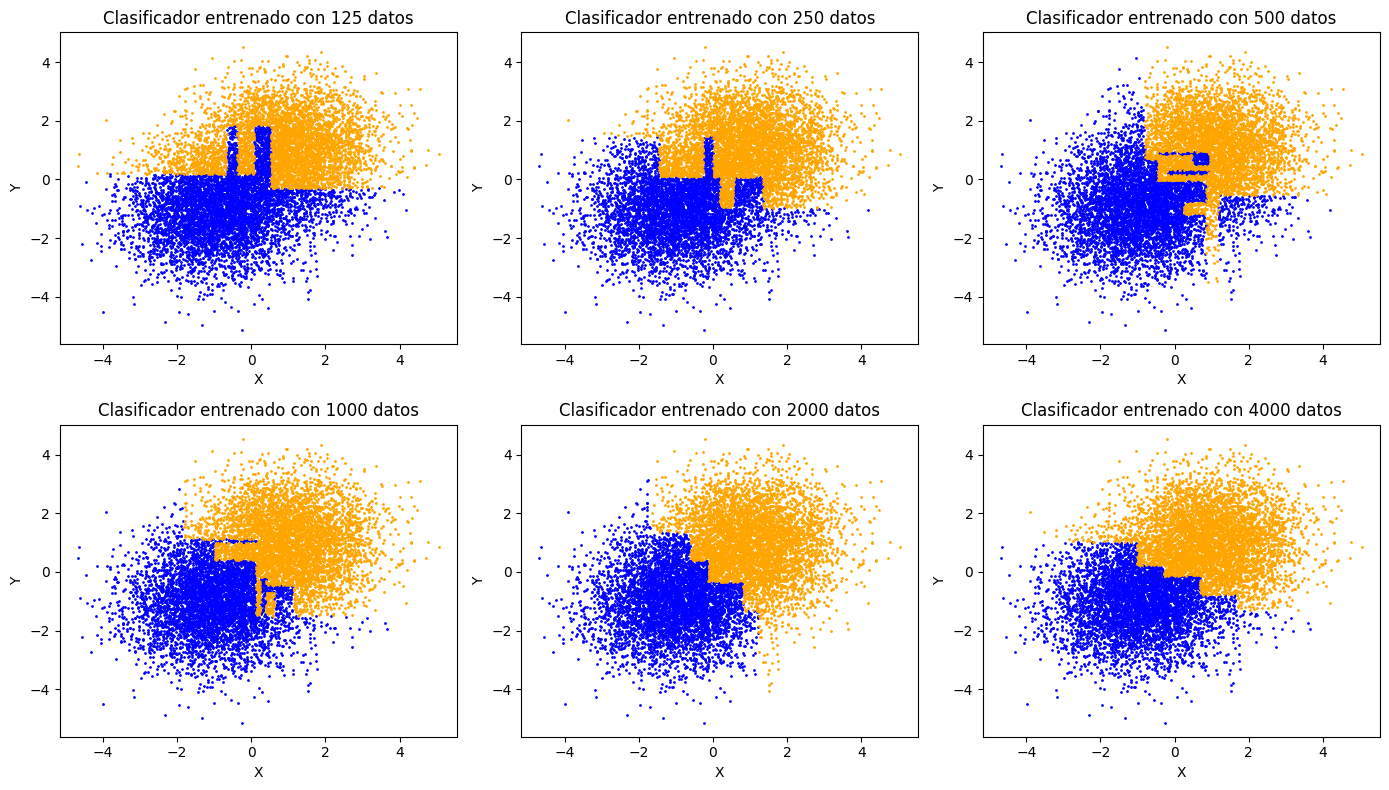

In [171]:
def plotPerSize(trainingSets, classifiers, testSet, setSizes):

    testSet = list(testSet["Input"])
    fig, axes = plt.subplots(2, 3, figsize = (14, 8))
    axes = axes.flatten()
    for i, trainingSet in enumerate(trainingSets):
    
        # Predecimos sobre el conjunto de testeo
        predict = classifiers[i].predict(testSet)
    
        # Nos quedamos con las componentes de los clase 0
        x0 = np.array([e[0] for (i,e) in enumerate(testSet) if predict[i] == 0])
        y0 = np.array([e[1] for (i,e) in enumerate(testSet) if predict[i] == 0])
    
        # Y las componentes de los clase 1
        x1 = np.array([e[0] for (i,e) in enumerate(testSet) if predict[i] == 1])
        y1 = np.array([e[1] for (i,e) in enumerate(testSet) if predict[i] == 1])
    
        # Y plotteamos en el subplot correspondiente
        axes[i].scatter(x0, y0, color = "blue", s = 1)
        axes[i].scatter(x1, y1, color = "orange", s = 1)
    
        # Detalles del plot
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        axes[i].set_title(f'Clasificador entrenado con {setSizes[i]} datos')
    
    plt.tight_layout()
    plt.show()

# Obtenemos el primero de cada tamaño
trainingSetsDiagonalesSample = [tSet[0] for tSet in trainingSetsDiagonales]
classifiersDiagonalesSample  = [cSet[0] for cSet in classifiersDiagonales] 
plotPerSize(trainingSetsDiagonalesSample, classifiersDiagonalesSample, testSetDiagonales, setSizes)

## Comentarios
Con mas datos funciona mejor.

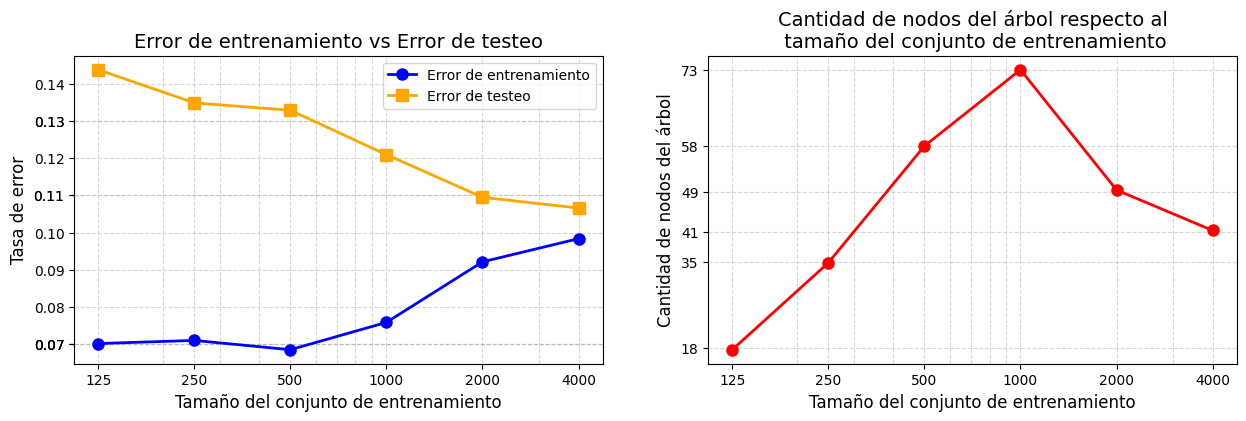

In [172]:
def plotErrors(trainingErrors, testErrors, treeSizes, setSizes):
    
    # Una vez calculados los errores y cantidad de nodos para cada par de clasificador y conjunto de entrenamiento, tomamos las medias
    meanTrainingErrors = [np.mean(errorList) for errorList in trainingErrors]
    meanTestErrors     = [np.mean(errorList) for errorList in testErrors]
    meanTreeSizes      = [np.mean(sizeList)  for sizeList in treeSizes]
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 4))
    
    # Graficamos error de entrenamiento contra error de testeo
    axes[0].plot(setSizes, meanTrainingErrors, color="blue", marker='o', linestyle='-', linewidth=2, markersize=8, label='Error de entrenamiento')
    axes[0].plot(setSizes, meanTestErrors, color="orange", marker='s', linestyle='-', linewidth=2, markersize=8, label='Error de testeo')
    axes[0].set_xlabel("Tamaño del conjunto de entrenamiento", fontsize=12)
    axes[0].set_ylabel("Tasa de error", fontsize=12)
    axes[0].set_title("Error de entrenamiento vs Error de testeo", fontsize=14)
    axes[0].grid(True, which="both", linestyle='--', alpha=0.5)
    axes[0].legend(fontsize=10)
    
    # Y los tamaños de los arboles
    axes[1].plot(setSizes, meanTreeSizes, color="red", marker='o', linestyle='-', linewidth=2, markersize=8)
    axes[1].set_xlabel("Tamaño del conjunto de entrenamiento", fontsize=12)
    axes[1].set_ylabel("Cantidad de nodos del árbol", fontsize=12)
    axes[1].set_title("Cantidad de nodos del árbol respecto al\n tamaño del conjunto de entrenamiento", fontsize=14)
    axes[1].grid(True, which="both", linestyle='--', alpha=0.5)
    
    # Marcamos los tamaños adecuados en el eje X y la escala logaritmica
    for ax in axes:
        ax.set_xscale("log")
        ax.set_xticks(setSizes)  
        ax.get_xaxis().set_major_formatter(plt.ScalarFormatter()) # Esto cambia los numeros a notacion normal y no cientifica
        ax.tick_params(axis='x', which='minor', bottom=False)     # Esconde los ticks del eje que no son relevantes
    
    # Y setteamos los valores del eje Y para que matcheen con nuestros resultados
    axes[0].set_yticks(np.round(sorted(set(meanTrainingErrors + meanTestErrors)), decimals=2))
    axes[1].set_yticks(np.round(meanTreeSizes, decimals=0))  # 
    
    plt.show()

plotErrors(trainingErrorsDiagonales, testErrorsDiagonales, treeSizesDiagonales, setSizes)


## Comentarios

 Todo

## Resolucion - Caso paralelas
Repetimos el mismo proceso pero con el generador para paralelas.

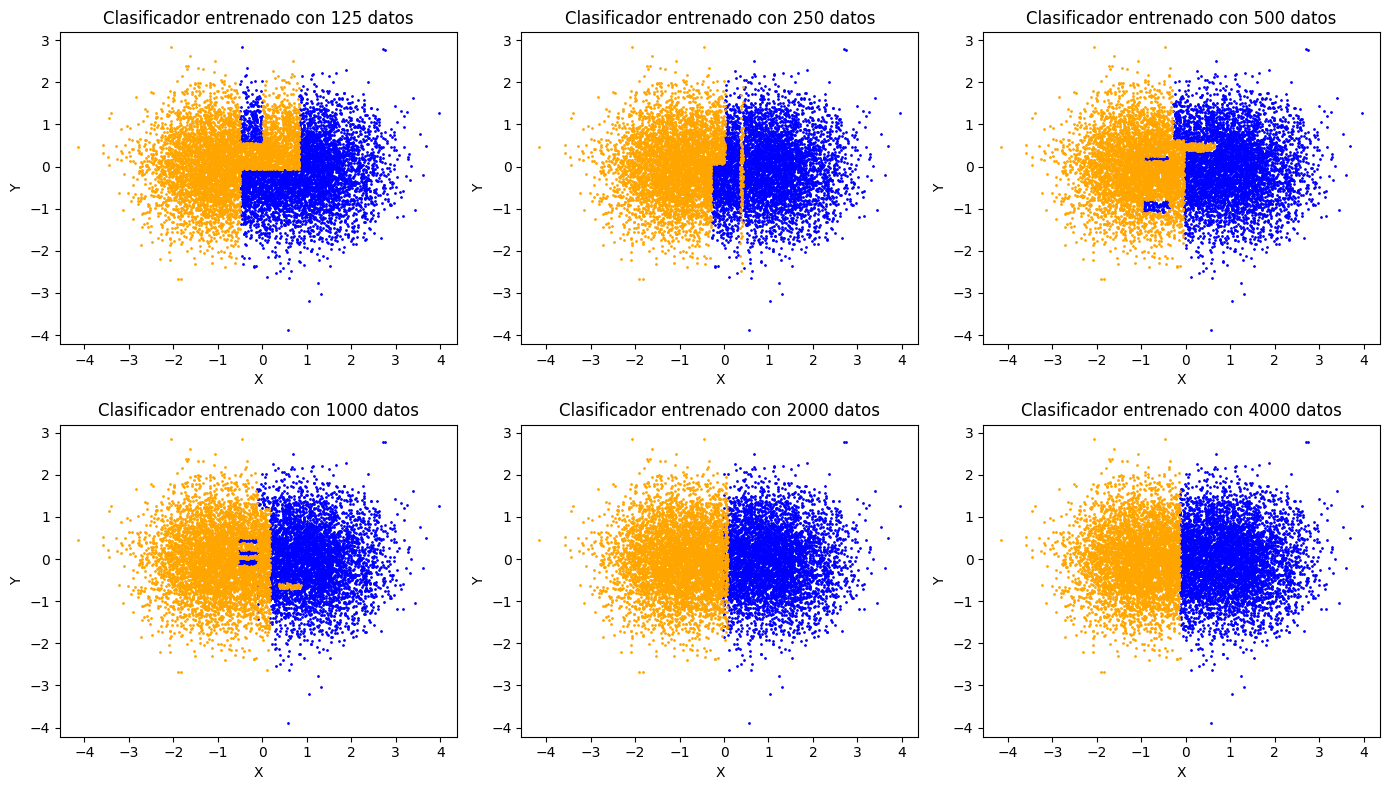

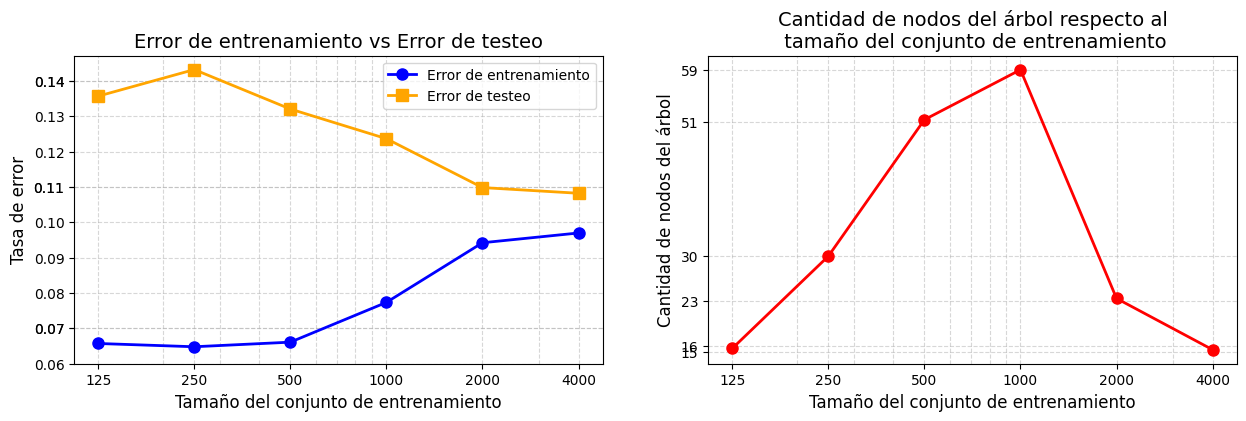

In [175]:
# Ya tenemos las funciones definidas, solo falta llamarlas con el nuevo generador
testSetParalelas = paralelas(n, d, C)
trainingSetsParalelas = generateTrainingSets(setSizes, setCount, paralelas, d, C)
classifiersParalelas = generateClassifiers(setSizesCount, setCount, trainingSetsParalelas)

# Evaluamos el error
(trainingErrorsParalelas, testErrorsParalelas, treeSizesParalelas) = getPerformanceStats(trainingSetsParalelas, setSizesCount, setCount, testSetParalelas, classifiersParalelas)

# Obtenemos un classifier particular para cada tamaño
trainingSetsParalelasSample = [tSet[0] for tSet in trainingSetsParalelas]
classifiersParalelasSample  = [cSet[0] for cSet in classifiersParalelas] 

# Imprimimos las predicciones
plotPerSize(trainingSetsParalelasSample, classifiersParalelasSample, testSetParalelas, setSizes)

# Y los graficos de error y cantidad de nodos
plotErrors(trainingErrorsParalelas, testErrorsParalelas, treeSizesParalelas, setSizes)



## Comentarios

# Ejercicio 3 - Resistencia al ruido.
## Enunciado.

Genere datasets con d = 5, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando el valor de C (overlapping de las clases) de 0.5 a 2.5 con incrementos de 0.5. Como en el punto anterior, para cada valor dado de C cree 20 conjuntos distintos de entrenamiento, pero uno solo de test. Genere una gráfica del test-error en función de C para el problema "paralelo" y el "diagonal" (sólo los promedios de los 20 conjuntos para cada valor de C).

También incluya en la gráfica los valores mínimos que se piden en el opcional 3.1 (el que no haga el opcional los puede pedir a la catedra). Todos los resultados de los dos problemas y el error mínimo en la misma gráfica. Discuta los resultados.

## Resolucion.
Comencemos por definir las funciones que nos serviran para el caso de diagonales y el caso de paralelas.

In [ ]:
# Definimos los parametros
d = 5
ntrain = 250
ntest = 10000
cvals = [0.5, 1, 1.5, 2, 2.5]

setCount = 20
cValsCount = 5

In [177]:
# Definimos una funcion que dados los parametros y la lista de valores de C genere la lista de training sets
def generateTrainingSetsC(setCount, generator, d, n, cvals):

    # Inicializamos la lista de conjuntos de entrenamiento
    trainingSets = [[] for _ in range(len(cvals))]
    
    # Para cada valor de C
    for i, C in enumerate(cvals):

        # Generamos setCount conjuntos de entrenamiento de tamaño n
        for _ in range(setCount):
            trainingSets[i].append(generator(n, d, C))
            # time.sleep(1)    

    return trainingSets

In [ ]:
# La funcion para generar clasificadores es identica a la del ejercicio anterior, donde setSizesCount es cValsCount

In [ ]:
# Caso diagonales.


# Ejercicio 3.1 (Opcional).
Puede calcular para cada valor de C cuál es el mínimo error que se puede conseguir? Cómo se comparan dichos valores con los obtenidos con el árbol? Obtenga una curva de error mínimo y agréguela a la gráfica anterior. Explique brevemente cómo obtuvo los valores mínimos.
Hay varias maneras de hacerlo. Una simple es imaginando cuál es el clasificador ideal o de mínimo error para este problema (a ese clasificador se lo llama "clasificador de Bayes") y midiendo directamente sobre un conjunto de test grande (10000 puntos para d=5) cuántos puntos son mal clasificados por ese clasificador ideal. Para que verifiquen sus resultados, el error de Bayes para el diagonal con C=1.00 es 15.86%

# Ejercicio 4 - Dimensionalidad
Genere datasets con C = 0.78, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando esta vez el valor de d según la siguiente lista: 2, 4, 8, 16, 32. Para cada valor de d cree 20 conjuntos distintos de entrenamiento, y uno solo de test. Genere una gráfica del train y test error en función de d para el problema "paralelo" y el "diagonal" (todos en la misma gráfica). Discuta los resultados.

# Ejercicio 5 (Opcional) - XOR
Baje de los archivos al problema XOR. Grafique las clases. Observando el problema, indique cuál es el árbol más simple que clasifica correctamente todos los puntos. Aplique ahora un árbol con el siguiente setup DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 
sobre este problema, y explique el resultado obtenido.


74
75
25
25
47
3


[]

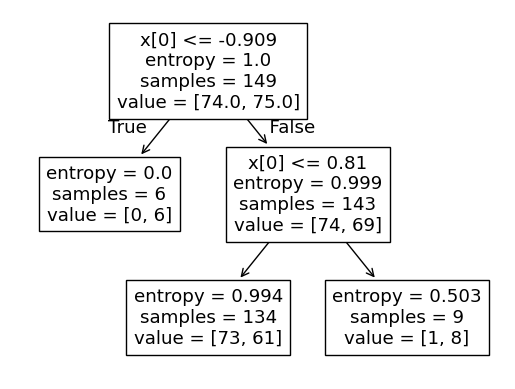

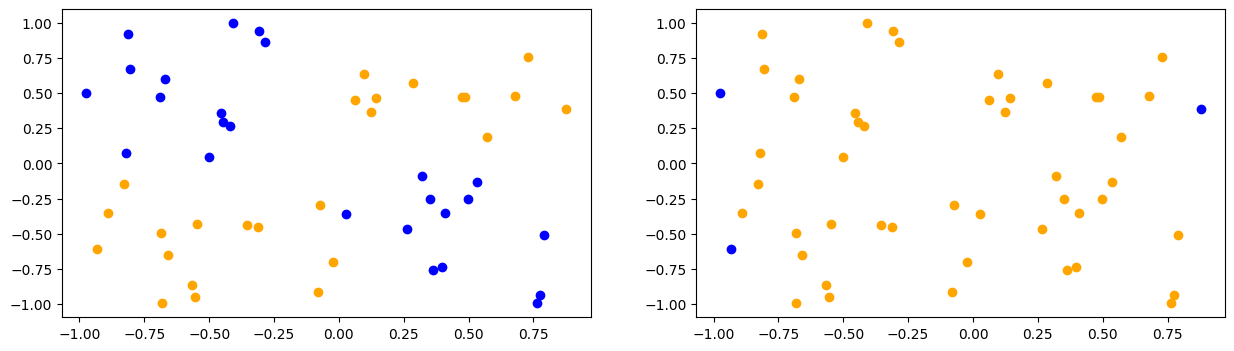

In [176]:
# Cargamos el archivo xor.csv como dataframe
xorDf = pd.read_csv('/home/octavio/materias/ia/aprendizaje_automatizado/xor.csv')
xorDf.columns = ["x", "y", "target"]

# Creamos el X y el y
X = xorDf[["x", "y"]]
y = xorDf["target"]

# Creamos su classifier
xorClassifier = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

# Creamos un split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(len(X_train[y_train == 0]))
print(len(X_train[y_train == 1]))



# Entrenamos sobre X_train
xorClassifier.fit(X_train, y_train)
tree.plot_tree(xorClassifier)

# Evaluamos en X_test y plotteamos ambas
y_predict = xorClassifier.predict(X_test)

# Separamos a los pares (x, y) de test en dos clases
X_test_class0 = X_test[y_test == 0] 
X_test_class1 = X_test[y_test == 1]  

# Y lo mismo pero considerando las predicciones
X_test_class0_pred = X_test[y_predict == 0] 
X_test_class1_pred = X_test[y_predict == 1]  

print(len(X_test_class0))
print(len(X_test_class1))


print(len(X_test_class0_pred))
print(len(X_test_class1_pred))

fig, axes = plt.subplots(1, 2, figsize = (15, 4))
axes[0].scatter(X_test_class0["x"], X_test_class0["y"], color = "orange")
axes[0].scatter(X_test_class1["x"], X_test_class1["y"], color = "blue")

axes[1].scatter(X_test_class0_pred["x"], X_test_class0_pred["y"], color = "orange")
axes[1].scatter(X_test_class1_pred["x"], X_test_class1_pred["y"], color = "blue")

plt.plot()
